# Final Project Report

* Class: DS 5100
* Student Name:
* Student Net ID:
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/CEJ2VH/MonteCarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
# A code block with your classes.
import pandas as pd
import numpy as np
class die():
    """Die object. Goal is to create an object that can be _rolled_ to 
    produce a random output of results based on the faces of the die.
    
    Methods: __init__, change_weight, roll_die

    Callable attributes:
        n_sides: number of sides of the die object
    """
    
    def __init__(self, faces):
        """
        __init__ takes a NumPy array of values equal to the faces of a die
        object. Each face is initially given a weight of 1. This is passed 
        into a DataFrame private to the object for producing weighted rolls.

        Arguments: faces- NumPy array of unique sides of a die.
        Outputs: None
        """
        #take array of faces
        #number of sides is equal to length of array
        #weight is equal to 1 for each face to begin with
        if(type(faces)!=np.ndarray):
            raise TypeError("Die sides/faces must be submitted in a NumPy array.")       
        elif(len(set(faces))!=len(faces)):
            raise ValueError("Dice sides are not distinct!")
        else:
            self.n_sides = len(faces)
            #self.probs = [1/len(faces) for i in faces]
            self._die_info = pd.DataFrame({
             'faces': faces,
             'weights':[1 for i in faces]})
             #'probs': self.probs}
        

    def change_weight(self, face, newweight):
        """
        Given a face value and weight, update the weight for that particular side 
        of the die.
        Arguments: 
                    face- value of the side of a die
                    newweight- castable number for new weight 
        Outputs: None
        """
        
        #Check if it's numeric or castable string
        if(type(newweight)==str and newweight.isdigit()==False):
            raise TypeError("Proposed new weight must be a positive number")
        
        elif (newweight < 0 or type(newweight) not in(int, float, str)):
            raise TypeError("Proposed new weight must be a positive number")
        #Check to see if face entered is in the list and if not raise index error
        if(face not in self._die_info.values):
            raise IndexError('Side entered does not exist in die!')
        
        
        else:
            faceindex=self._die_info.index[self._die_info['faces'] == face].tolist()[0]
            self._die_info.at[faceindex,'weights']=int(newweight)

            
        
    
    def roll_die(self, n_rolls=1):
        """Roll a die one or more times and return the results.
        
        Arguments: n_rolls- number of times the die should be rolled (default 1)
        Outputs: a list of all values randomly obtained n times
        """
        results = []
        for i in range(n_rolls):
            result = self._die_info.faces.sample(weights=self._die_info.weights,replace=True).values[0]
            results.append(result)
        return list(results)

    def current_state(self):
        """
        Returns the current list of die sides and weights
        Arguments: None
        Outputs: Dataframe of die sides and weights
        """
        return self._die_info

class game():
    """Game object designed to take one or more dice objects and roll all dice objects
    at once. The results can then be viewed.
    
    Methods: __init__, play, most_recent_play
    Callable attributes:
        dice- list of dice for rolling
        num_dice- number of dice per game


    """
   
    def __init__(self, dice):
        """
        Creates a game object, which is simply a collection of dice. 
        Arguments: List of dice with sides and weights
        Outputs:None
        """
        self.dice = dice
        self.num_dice=len(dice)
        #_results is the private instantiation of the empty list where roll results will be appended in play()
        self._results=[]
        self._df="No dice have been rolled yet!"
        #Check to make sure the dice are the same
        #empty lists for sides and faces
        sides=[]
        faces=[]
        for i in self.dice:
            sides.append(i.n_sides,)
            faces.append(tuple(i._die_info['faces']))
        if(len(set(faces))!=1 or len(set(sides)) !=1):
            raise ValueError("Dice are not the same!")

    def play(self,n_rolls=1):
        """
        Clears any previous roll results.
        Rolls all dice in the dice list a given number of times  and saves the results

        Arguments: n_rolls- number of times all dice should be rolled
        Outputs: None
        """
         #Clear last results
        self._results.clear()
        
        for die in self.dice:
            dierolls=die.roll_die(n_rolls)
            self._results.append(dierolls)
        self._df=pd.DataFrame(self._results)
        #results in a df where each row is a die's result rather than a roll # so transposing
        self._df=self._df.transpose()
        
        self._df.index.names = ['roll_number']
        #return self.df


    
    def most_recent_play(self,tableformat='wide'):
        """
        Returns the last sets of rolled dice results with two format options.
        'Wide' table format has a row for each roll, with eache die as a column
        'narrow' table format is stacked so that the result of the roll is the only 
        and the roll number and die number

        Arguments: tableformat- specifies wide or narrow table, with wide as default
        Outputs: Dataframe of results in wide or narrow form
        """
        if(tableformat not in('narrow','wide')):
            raise ValueError('most_recent_play takes input of narrow or wide.')
        elif(tableformat=='wide'):
            return self._df
        else:
            #Probably easier way to do this but I needed the roll # as an explicit column for my solution
            #instantiated an empty list and filled it with the indices from the df of most recent results
            rollnum=[]
            flat=self._df.copy()
            for i in range(0,len(self._df.index)):
                rollnum.append(i)
            flat['rollnum']=rollnum
            flat['rollnum']=flat.index
            #using the melt function to create a narrow version of the table
            narrow=pd.melt(flat,id_vars=['rollnum'],var_name='dienum',value_name='result')
            narrow=narrow.set_index(['rollnum','dienum'])
            return narrow
class analyzer():
    """ Analyzer class designed to take game, comprised of a list of dice.
        The class is designed to return statistics of a game played with dice.

        Methods: jackpot, face_counts_per_roll, combo_count, permutation_count

        Callable attributes: 
            game- the game object passed for analyzing
            stats- the most recent result of play from the game object
    """
    
    def __init__(self, gameobj):
        """
        Creates an object that is passed a game to initialize. Saves the last results
        of the game.play() output, as well as the die and side information

        Arguments: gameobj- object of type 'game'
        Outputs: None
        """
        self.game = gameobj
        if(type(self.game)==game):
            self.stats=self.game.most_recent_play()
            #get a list of faces for the dice in the game object and save it to a private variable
            self._faces=list(self.game.dice[1].current_state().iloc[:,0])
            #get the dice in list form to use in other methods, stored privately
            self._dicelist=list(self.stats.columns.values)
        else: 
            raise ValueError('Must be of type game!')
        
    def jackpot(self):
        """
        Based on the last play() method, calculates how many times all dice in the
        game object got the same face value for a given roll.

        Arguments: None
        Outputs: Count of times all dice rolled the same face value
        """
        jkptcount=0
        #Need to iterate through rows (or transposed columns)
        #If the length of distinct values is equal to 1, the jackpot counter goes up by 1
        for i in range(0,len(self.stats.index)):
            col=list(self.stats.loc[i,:])
            if(len(set(col))==1):
                jkptcount +=1
        return int(jkptcount) 
    
    def face_counts_per_roll(self):
        """
        Takes the last play result from the game object and calculates how many
        times each face was rolled, per roll.

        Arguments: None
        Outputs: Dataframe with with the faces and counts per roll
        """
        #Rows: # of times dice were rolled
        #Columns: Equal to # of sides in dice
        counts = self.stats.copy()
        faces = self._faces
        num_dice = self._dicelist
        
        # get most recent play, melt it down, and add count
        temp = counts.reset_index()

        temp = temp.melt(id_vars=['roll_number'], value_vars=num_dice,
                        var_name='die_number', value_name='result')
        temp['count'] = 1

        # set up dataframes for unique roll numbers & faces
        counts = pd.DataFrame(temp['roll_number'].unique(), columns=['roll_number'])
        faces = pd.DataFrame(self._faces, columns=['faces'])

        # add common key & then cross join
        # (so all faces are included even if they aren't rolled)
        counts['key'] = 1
        faces['key'] = 1
        staging = counts.merge(faces, on='key', how='outer').drop('key', axis=1)

        # now join counts into final df
        final = staging.merge(temp, left_on=['roll_number', 'faces'], right_on=['roll_number', 'result'], how='left')

        # fill in zeroes for nulls in count col
        final['count'] = final['count'].fillna(0)

        # drop unneeded columns
        final = final[['roll_number', 'faces', 'count']]

        final = final.pivot_table(index='roll_number', columns='faces', values='count', aggfunc='sum')
        
        
        #1) Get list of distinct values that were rolled (iterate through entire dataframe) and sort it
        #2) Make a list, from 0 to n-1 (where n is the df size) 
        return final

    def combo_count(self):
        """
        Takes the most recent play from the game object and calculates how many times
        each combination of sides was rolled. This is not order dependent (i.e. 1-2-1
        is equivalent to 2-1-1)

        Arguments: None
        Outputs: Dataframe with with the combinations and counts 
        """
        #currently not using num_dice
        num_dice = self._dicelist
        combos=self.stats.copy()
        
        # make order independent roll df
        combos['ordered_rolls'] = pd.Series([tuple(x) for x in np.sort(combos.values, 1)])
        combos['count'] = 1

        combos = combos[['ordered_rolls', 'count']]

        # now group by the new dies
        combo_counts = combos.groupby('ordered_rolls')['count'].count()
        return combo_counts

    
    def permutation_count(self):
        """
        Takes the most recent play from the game object and calculates how many times
        each permutation of sides was rolled. This IS order dependent (i.e. 1-2-1
        is NOT equivalent to 2-1-1)

        Arguments: None
        Outputs: Dataframe with with the permutations and counts 
        """
        perms=self.stats.copy()
        perms['rolls'] = pd.Series([tuple(x) for x in perms.values])
        perms['count'] = 1
        perm_counts=perms.groupby(['rolls']).count()
        perm_counts=perm_counts[['count']]

        
        return perm_counts

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
# A code block with your test code.
import numpy as np, pandas as pd
from MonteCarlo import die, game, analyzer
import unittest

class DiceGameSuite(unittest.TestCase):
    
    def test_1_die_add(self): 
        # Add dice of different kinds
        coinvals=np.array(['heads','tails'])
        dievals=np.array([1,2,3,4,5,6])
        coin1=die(coinvals)
        coin2=die(coinvals)
        die1=die(dievals)
        die2=die(dievals)
        die3=die(dievals)
        #Test if coin is of type die
        self.assertTrue(type(coin1) is die)

    def test_2_die_change_weight(self):
        # change weight of coin 2 and confirm
        coinvals=np.array(['heads','tails'])
        coin2=die(coinvals)
        coin2.change_weight('heads',4)
        self.assertEqual(coin2._die_info['weights'][0], 4)
                
    def test_3_die_roll(self): 
        # Roll a die and confirm the results have the expected length
        rollnum=5
        coinvals=np.array(['heads','tails'])
        coin1=die(coinvals)
        coin1roll=coin1.roll_die(rollnum)
        self.assertEqual(len(coin1roll),rollnum)
        
    def test_4_die_current_state(self): 
        # get last state of a rolled die
        #if a die/coin has not been "rolled" yet, it returns a message saying nothing has been rolled
        coinvals=np.array(['heads','tails'])
        coin1=die(coinvals)
        initstate=coin1.current_state().copy()
        nr=3
        coin1.roll_die(nr)
        nextstate=coin1.current_state()
        self.assertEqual(type(nextstate),type(initstate))
       
        
    def test_5_game_add(self): 
        # Add 2 coins to a game, confirm the array of coins passed matches the number of coins in the game
        dievals=np.array([1,2,3,4,5,6])
        d1=die(dievals)
        d2=die(dievals)
        dietst=[d1,d2]
        game1=game(dietst)
        self.assertEqual(len(dietst),len(game1.dice))

    def test_6_game_play(self):
        # Add some dice to a game, roll 10 times, and make sure the number of times rolled matches the df size
        dievals=np.array([1,2,3,4,5,6])
        d3=die(dievals)
        d4=die(dievals)
        setdie=[d3,d4]
        game2=game(setdie)
        playnum=10
        game2.play(playnum)
        g2=game2.most_recent_play()
        self.assertEqual(playnum,int(g2.shape[0]))
        
    def test_7_most_recent_play(self):
        # Get most recent play and test if the most recent value is correctly
        # typed to game
        dievals=np.array([1,2,3,4,5,6])
        d5=die(dievals)
        d6=die(dievals)
        setdie=[d5,d6]
        game3=game(setdie)
        playnum=10
        game3.play(playnum)
        g3chk = game3.most_recent_play()
        self.assertEqual(type(game3),game)
        
    def test_8_analyzer_add(self):
        #Create dice, a game for the dice, and an analyzer and check type
        dievals=np.array([1,2,3,4,5,6])
        die1=die(dievals)
        die2=die(dievals)
        dielist=[die1,die2]
        game4=game(dielist)
        game4.play(2)
        an1=analyzer(game4)
        self.assertEqual(type(an1),analyzer)
    
    def test_9_analyzer_jackpot(self):
        #Check if jackpot returns an int
        dievals=np.array([1,2,3,4,5,6])
        die1=die(dievals)
        die2=die(dievals)
        dielist=[die1,die2]
        game4=game(dielist)
        game4.play(200)
        an1=analyzer(game4)
        jackpot=an1.jackpot()
        self.assertEqual(type(jackpot),int)
    def test_10_analyzer_face_counts_per_roll(self):
        #Make analyzer and ensure the face counts per roll df
        # has the same # of columns as faces of the die
        dievals=np.array([1,2,3,4,5,6])
        die1=die(dievals)
        die2=die(dievals)
        dielist=[die1,die2]
        game4=game(dielist)
        game4.play(200)
        an1=analyzer(game4)
        self.assertEqual(len(dievals),len(an1.face_counts_per_roll().columns))
    def test_11_analyzer_combo_counts(self):
        #Checking to see if the multi index worked
        #Index name should be 'ordered_rolls'
        dievals=np.array([1,2,3,4,5,6])
        die1=die(dievals)
        die2=die(dievals)
        dielist=[die1,die2]
        game4=game(dielist)
        game4.play(200)
        an1=analyzer(game4)
        self.assertEqual(an1.combo_count().index.name,'ordered_rolls')

    def test_12_analyzer_perm_counts(self):
        #Very similar to combo_count, want to see if the multi index worked
        #Index name should be 'rolls'
        dievals=np.array([1,2,3,4,5,6])
        die1=die(dievals)
        die2=die(dievals)
        dielist=[die1,die2]
        game4=game(dielist)
        game4.play(200)
        an1=analyzer(game4)
        self.assertEqual(an1.permutation_count().index.name,'rolls')
       
if __name__ == '__main__':
    unittest.main(verbosity=3)



## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [8]:
#importing some packages for testing
import pandas as pd
import numpy as np
import MonteCarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [9]:
# I imported the classes separately so I'll call the docs class by class
help(MonteCarlo)

Help on module MonteCarlo:

NAME
    MonteCarlo

CLASSES
    builtins.object
        analyzer
        die
        game
    
    class analyzer(builtins.object)
     |  analyzer(gameobj)
     |  
     |  Analyzer class designed to take game, comprised of a list of dice.
     |  The class is designed to return statistics of a game played with dice.
     |  
     |  Methods: jackpot, face_counts_per_roll, combo_count, permutation_count
     |  
     |  Callable attributes: 
     |      game- the game object passed for analyzing
     |      stats- the most recent result of play from the game object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, gameobj)
     |      Creates an object that is passed a game to initialize. Saves the last results
     |      of the game.play() output, as well as the die and side information
     |      
     |      Arguments: gameobj- object of type 'game'
     |      Outputs: None
     |  
     |  combo_count(self)
     |      Takes the

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/CEJ2VH/MonteCarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [12]:
coinvals=np.array(['H','T'])
coin1=die(coinvals)
coin2=die(coinvals)
coin2.change_weight('H',5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [19]:
from MonteCarlo import die, game, analyzer
coin3=die(coinvals)
faircoins=[coin1,coin3]
fairgame=game(faircoins)
fairgame.play(1000)
#Play was not supposed to return anything, so to see the results we must call most_recent_play
fairgame.most_recent_play()

,0,1
roll_number,,
0,H,T
1,H,T
2,T,T
3,H,H
4,T,T
...,...,...
995,T,H
996,H,H
997,H,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [21]:
unfairdice=[coin1, coin2, coin2]
unfairgame=game(unfairdice)
unfairgame.play(1000)
unfairgame.most_recent_play()

,0,1,2
roll_number,,,
0,H,H,H
1,T,H,H
2,H,H,T
3,H,H,T
4,H,H,H
...,...,...,...
995,H,H,H
996,H,H,H
997,T,H,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [25]:
fairan=analyzer(fairgame)
unfairan=analyzer(unfairgame)
print("Fair jackpot is " + str(fairan.jackpot()))
print("Unfair jackpot is " + str(unfairan.jackpot()))

Fair jackpot is 499
Unfair jackpot is 365


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [28]:
f_rel_fr=fairan.jackpot()/1000
uf_rel_fr=unfairan.jackpot()/1000
print("Fair jackpot relative frequency is " + str(f_rel_fr))
print("Unfair jackpot relative frequency is " + str(uf_rel_fr))

Fair jackpot relative frequency is 0.499
Unfair jackpot relative frequency is 0.365


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

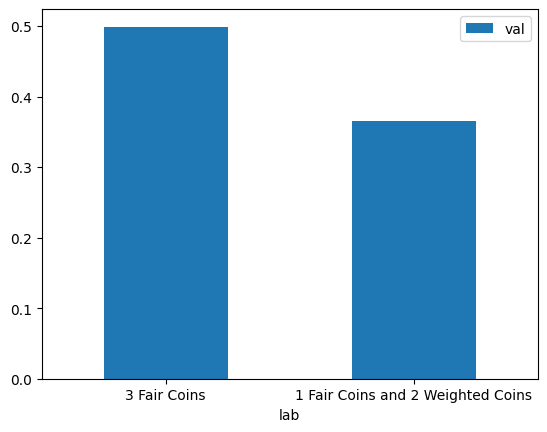

In [43]:
coin_freqs=[f_rel_fr, uf_rel_fr]
coin_names=['3 Fair Coins','1 Fair Coins and 2 Weighted Coins']
plot = pd.DataFrame({'lab':coin_names, 'val':coin_freqs})

ax = plot.plot.bar(x='lab', y='val', rot=0)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [34]:
f1=die(np.array([1,2,3,4,5,6]))
f2=die(np.array([1,2,3,4,5,6]))
uf1=die(np.array([1,2,3,4,5,6]))
uf2=die(np.array([1,2,3,4,5,6]))
dt=[f1,f2,uf1]

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [35]:
uf1.change_weight(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [36]:
uf2.change_weight(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [40]:
fairdice=[f1,f1,f1,f1,f1]
fairdgame=game(fairdice)
fairdgame.play(10000)
fairdgame.most_recent_play()

,0,1,2,3,4
roll_number,,,,,
0,5,2,4,6,5
1,5,4,4,4,4
2,4,6,4,6,4
3,2,6,2,5,1
4,6,4,2,6,3
...,...,...,...,...,...
9995,6,1,6,2,3
9996,6,1,2,6,5
9997,5,6,3,3,1


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [41]:
unfairdice=[f1,f1,f1,uf1,uf2]
unfairdgame=game(unfairdice)
unfairdgame.play(10000)
unfairdgame.most_recent_play()

,0,1,2,3,4
roll_number,,,,,
0,5,2,5,3,6
1,1,1,1,6,3
2,4,2,3,1,6
3,2,6,4,6,3
4,1,2,4,6,2
...,...,...,...,...,...
9995,2,4,2,6,1
9996,6,5,1,6,1
9997,4,4,5,4,1


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

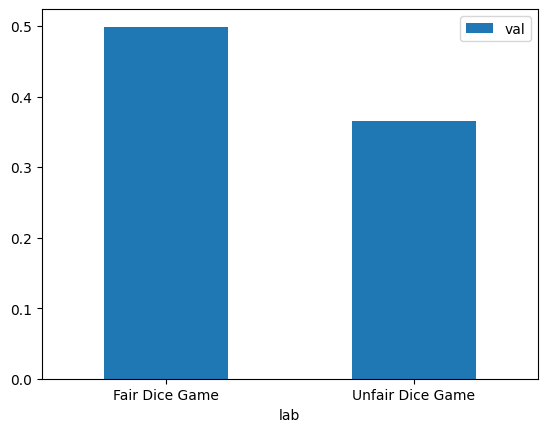

In [44]:
fair_an=analyzer(fairdgame)
unfair_an=analyzer(unfairdgame)
fd_rel_fr = fair_an.jackpot()/10000
ufd_rel_fr = unfair_an.jackpot()/10000

die_freqs=[f_rel_fr, uf_rel_fr]
die_names=['Fair Dice Game','Unfair Dice Game']
plot = pd.DataFrame({'lab':die_names, 'val':die_freqs})

ax = plot.plot.bar(x='lab', y='val', rot=0)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [47]:
#Doing some set up
eng = pd.read_csv('english_letters.txt', sep=" ", header=None)
eng.columns = ["Letter", "Counts"]
scr = pd.read_csv('scrabble_words.txt', sep=" ", header=None)
scr.columns = ["Scrabble_Words"]

#Don't actually need the percents, I was just curious
total = eng['Counts'].sum()
eng['FreqPercent']=eng['Counts']/total
#get a list of the letters in our file to creat the dice
alphabet=eng['Letter'].values.tolist()
#need to add the weights to the letters. It's easier to weight all at once
alp1=die(np.array(alphabet))
alp2=die(np.array(alphabet))
alp3=die(np.array(alphabet))
alp4=die(np.array(alphabet))

#Make list
words=[alp1,alp2,alp3,alp4]
#Change weights
for w in words:
    for lt in w._die_info['faces']:
        w.change_weight(lt,int(eng.loc[eng['Letter'] == lt,'Counts'].iloc[0]))

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [49]:
#Add to game and play
alphgame=game(words)
alphgame.play(1000)
#Again just calling to show
alphgame.most_recent_play()

,0,1,2,3
roll_number,,,,
0,G,P,E,R
1,R,E,R,T
2,U,T,M,B
3,G,E,R,T
4,D,I,M,M
...,...,...,...,...
995,C,I,T,N
996,N,T,Y,H
997,E,O,I,N


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [52]:
#Create an analyzer object for permutations
alphan=analyzer(alphgame)
#Store results from permutation count
perms=alphan.permutation_count()

#Make empty list for possible words and iterate through to join results from our permutation df
strperms=[]
for i in range(0,perms.shape[0]):
    strperms.append(''.join(perms.index[i]))
    
#Make empty list for actual Scrabble-legal words
realwords=[]
for string in strperms:
    if(string in scr.values):
        realwords.append(string)

#this is how many real words we found
found=len(realwords)

#This is how many words there are in our Scrabble "vocabulary"
vocab = scr['Scrabble_Words'].count()

diff= vocab-found

print("Our Scrabble list had ",vocab,"words and we found ",found," words. The difference is ",diff, " words!")

Our Scrabble list had  279494 words and we found  50  words. The difference is  279444  words!


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [53]:
a1=die(np.array(alphabet))
a2=die(np.array(alphabet))
a3=die(np.array(alphabet))
a4=die(np.array(alphabet))
a5=die(np.array(alphabet))
wordsagain=[a1,a2,a3,a4,a5]

#Change weights
for word in wordsagain:
    for letter in word._die_info['faces']:
        word.change_weight(letter,int(eng.loc[eng['Letter'] == letter,'Counts'].iloc[0]))

alphgame2=game(wordsagain)
alphgame2.play(1000)
alphgame2.most_recent_play()
alphan2=analyzer(alphgame2)
perms2=alphan2.permutation_count()

strings=[]
for i in range(0,perms2.shape[0]):
    strings.append(''.join(perms2.index[i]))
scrabblewords=[]
for string in strings:
    if(string in scr.values):
        scrabblewords.append(string)

found5 = len(scrabblewords)
diff5=vocab-found5

print("Our Scrabble list had ",vocab,"words and in our 5-die game we found ",found5," words. The difference is ",diff5, " words!")

Our Scrabble list had  279494 words and in our 5-die game we found  11  words. The difference is  279483  words!


Our four-word dice game found substantially more than our five-word dice game.